In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv("../src/data/raw_analyst_ratings/raw_analyst_ratings.csv")

In [17]:
print(df.shape)
df.head()


(1407328, 6)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [18]:
# Add a column for headline length
df['headline_length'] = df['headline'].str.len()

# descriptive statistics for headline length
headline_stats = df['headline_length'].describe()

print("Headline Length Statistics:")
print(headline_stats)


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


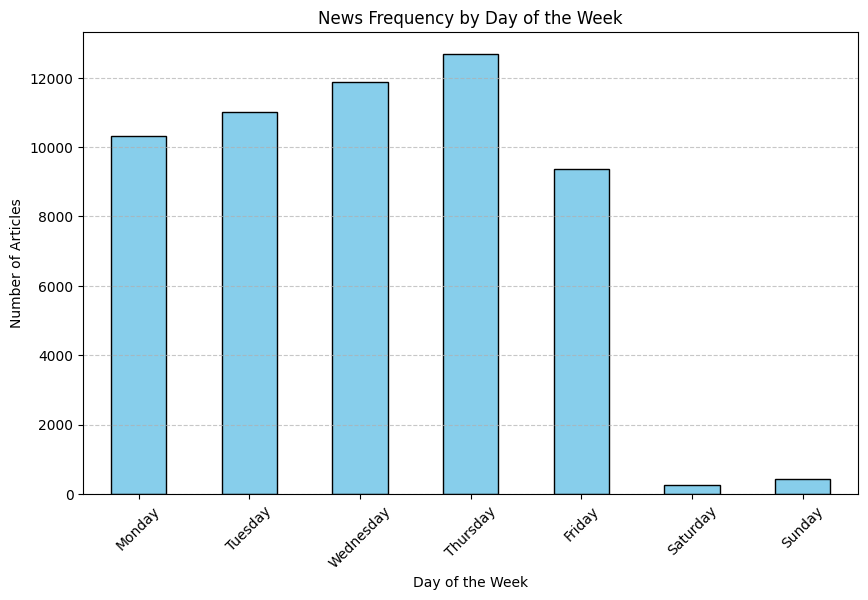

News Frequency by Day of the Week:
day_of_week
Monday       10322
Tuesday      11002
Wednesday    11891
Thursday     12688
Friday        9381
Saturday       267
Sunday         436
Name: count, dtype: int64


In [19]:
df = df.dropna(subset=['date'])
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Extract the day of the week
df['day_of_week'] = df['date'].dt.day_name()

day_counts = df['day_of_week'].value_counts()

# Sort the days to match the calendar order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order, fill_value=0)

# Plot the frequency of publications by day of the week
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('News Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print days with the highest news frequency
print("News Frequency by Day of the Week:")
print(day_counts)


In [20]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday


Time Series Analysis:

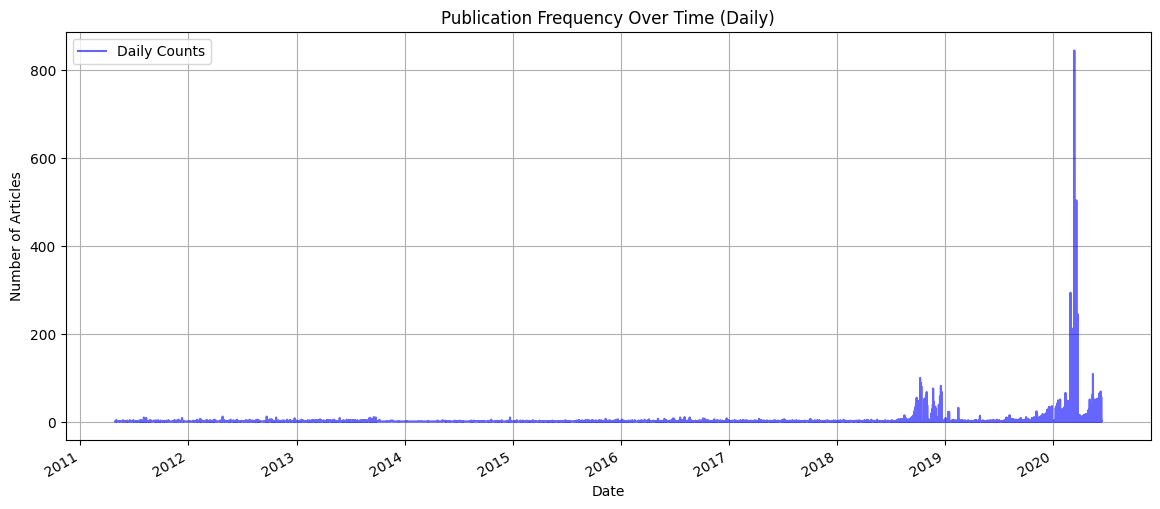

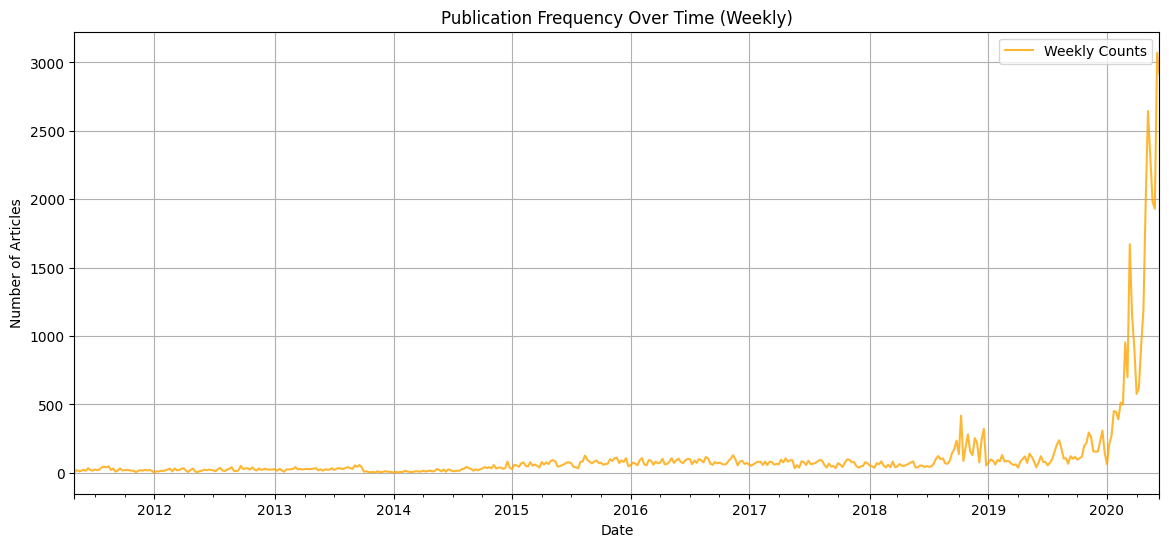

In [21]:
# Group by publication date and count articles
daily_counts = df.groupby('date').size()

# Convert index to DatetimeIndex for resampling
daily_counts.index = pd.to_datetime(daily_counts.index)

# Resample to get weekly trends 
weekly_counts = daily_counts.resample('W').sum()

# Plot daily trends
plt.figure(figsize=(14, 6))
daily_counts.plot(kind='line', label='Daily Counts', color='blue', alpha=0.6)
plt.title('Publication Frequency Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.legend()
plt.show()

# Plot weekly trends for smoother view
plt.figure(figsize=(14, 6))
weekly_counts.plot(kind='line', label='Weekly Counts', color='orange', alpha=0.8)
plt.title('Publication Frequency Over Time (Weekly)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.legend()
plt.show()


Publisher Analysis

Top Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


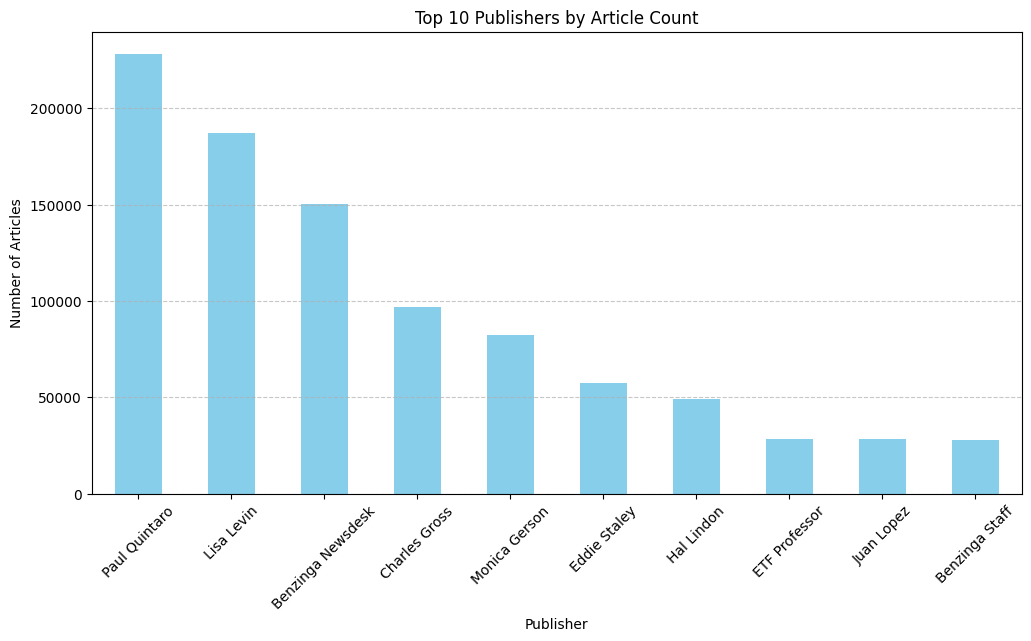

In [22]:
# Count the number of articles by each publisher
publisher_counts = df['publisher'].value_counts()

# Display the top publishers
print("Top Publishers by Article Count:")
print(publisher_counts.head(10))

# Plot the top publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Unique domains and their contribution frequency:
email_domain
benzinga.com              7937
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


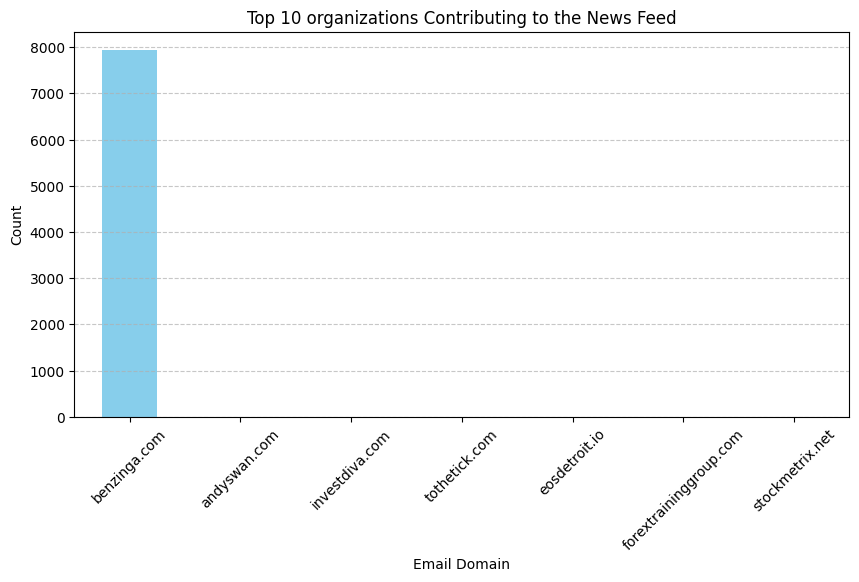

Data analysis completed and saved to 'analysed_ratings.csv


In [27]:
# Extract domain from email addresses
df['email_domain'] = df['publisher'].str.extract(r'@([a-zA-Z0-9.-]+)')

# Filter out rows with email domains (non-NaN)
email_domains = df.dropna(subset=['email_domain'])

# Remove gmail.com domain
org_domain = email_domains[email_domains['email_domain'] != 'gmail.com']

# Count frequency of each domain
domain_counts = org_domain['email_domain'].value_counts()

# Display the results
print("Unique domains and their contribution frequency:")
print(domain_counts)

# Plot the top 10 domains
plt.figure(figsize=(10, 5))
domain_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 organizations Contributing to the News Feed')
plt.xlabel('Email Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df.head()

output_path = '../src/data/analaysed_analyst_ratings/analysed_ratings.csv'
df.to_csv(output_path, index=False)
print("Data analysis completed and saved to 'analysed_ratings.csv")
